# Microbes to Whales: Preliminary Statistics 081417

18S
"/Users/kpitz/Projects/MBON/processed/18S/M2W/Analysis_20170411_1046_NT/all_lib"

COI
"/Users/kpitz/Projects/MBON/processed/COI/M2W_COI/Analysis_20170706_0933_M2W_COI/all_lib"

OTU_table_taxa_all.txt contains unassigned OTUs as well as assigned OTUs

/OTUs_swarm/OTU_table.csv  *all clustered OTUs without taxonomy


In [60]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn import manifold
from scipy.spatial import distance as dist

# File Locations

In [61]:
#18S_folder = "/Users/kpitz/Projects/MBON/processed/18S/M2W/Analysis_20170411_1046_NT/all_lib"
#COI_folder = "/Users/kpitz/Projects/MBON/processed/COI/M2W_COI/Analysis_20170706_0933_M2W_COI/all_lib"

#Analysis_folder A
Analysis_folder = "/Users/kpitz/Projects/MBON/processed/18S/M2W/Analysis_20170411_1046_NT/"
name = '18S'

#Analysis_folder B (if running comparison)
Analysis_folder_B = "/Users/kpitz/Projects/MBON/processed/COI/M2W_COI/Analysis_20170706_0933_M2W_COI/"
name_B = 'COI'


# Import Data

In [62]:
#Non-merged, non-rarefied OTU table
#95% Identity
file = Analysis_folder + "all_lib/OTU_table_taxa.txt"
data_tab=pd.read_csv(file, sep='\t', dtype={'taxonomy':object})

drop_list= data_tab.columns[1:-1]
tx_tab=data_tab.drop(drop_list, axis=1)
tx_tab['Kingdom']=tx_tab['taxonomy'].str.split("\"").str[1]
tx_tab['Phylum']=tx_tab['taxonomy'].str.split("\"").str[3]
tx_tab['Class']=tx_tab['taxonomy'].str.split("\"").str[5]
tx_tab['Order']=tx_tab['taxonomy'].str.split("\"").str[7]
tx_tab['Family']=tx_tab['taxonomy'].str.split("\"").str[9]
tx_tab['Genus']=tx_tab['taxonomy'].str.split("\"").str[11]
tx_tab['Species']=tx_tab['taxonomy'].str.split("\"").str[13]
tx_tab=tx_tab.drop('taxonomy', axis=1)
tx_tab.rename(columns={'DUP_ID':'OTU'}, inplace=True)
tx_tab = tx_tab.set_index('OTU')

data_tab.drop('taxonomy', axis=1, inplace=True)
data_tab.rename(columns={'DUP_ID':'OTU'}, inplace=True)
data_tab = data_tab.set_index('OTU')
print(len(data_tab.index))
print(len(tx_tab.index))

#print(data_tab.head())
#data_tab.to_csv('/Users/kpitz/Documents/Anni_18S_otu_tab_annot.csv')
tx_tab.head()
#tx_tab.to_csv('/Users/kpitz/Documents/Anni_18S_tx_tab_annot.csv')

5075
5075


,Kingdom,Phylum,Class,Order,Family,Genus,Species
OTU,,,,,,,
OTU_7,Eukaryota,Dinophyceae,Dinophyceae,Gymnodiniales,Gymnodiniaceae,Cochlodinium,Cochlodinium fulvescens
OTU_13,Eukaryota,Chlorophyta,Mamiellophyceae,Mamiellales,Bathycoccaceae,Ostreococcus,s__
OTU_14,Eukaryota,Dinophyceae,Dinophyceae,Gonyaulacales,Gonyaulacaceae,Alexandrium,s__
OTU_16,Eukaryota,Bacillariophyta,Bacillariophyceae,Bacillariales,Bacillariaceae,Pseudo-nitzschia,Pseudo-nitzschia fraudulenta
OTU_21,Eukaryota,Arthropoda,Maxillopoda,Poecilostomatoida,Corycaeidae,Corycaeus,Corycaeus speciosus


In [63]:
#look at #OTUs/Reads total, #OTUs/Reads assigned

file = Analysis_folder + "all_lib/OTU_table_taxa_all.txt"
total_tab=pd.read_csv(file, sep='\t', dtype={'Taxonomy':object})
total_tab.rename(columns={'DUP_ID':'OTU'}, inplace=True)
#total_tab.set_index(['OTU'], inplace=True)
#total_tab.reset_index(inplace=True)

#number of OTUs:
count_otu_a=total_tab['OTU'].count()
print("number of clustered OTUs:", count_otu_a)

#Total number of reads:
total_tab['sum_reads']=total_tab.sum(axis=1, numeric_only=True)
count_reads = total_tab.sum(axis=0, numeric_only=True)
total_read_count_a = count_reads['sum_reads']
print("total number of reads:", total_read_count_a)

#number of OTUs that have taxonomy:
tx_tab_T=tx_tab.reset_index()
count_otu=tx_tab_T['OTU'].count()
print("number of MEGAN assigned clustered OTUs:", count_otu)
tx_tab_T=tx_tab_T.set_index('OTU')

#Total number of reads with taxonomy:
total_tab=total_tab.set_index('OTU')
tax_reads= pd.concat([total_tab, tx_tab_T], join='inner', axis=1)
count_reads = tax_reads.sum(axis=0, numeric_only=True)
total_read_count = count_reads['sum_reads']

print("total number of assigned reads:", total_read_count)
print("Percent assigned reads:", (total_read_count/total_read_count_a)*100)
print("Percent assigned OTUs:", (count_otu/count_otu_a)*100)


tx_tab_merged=tx_tab_T.drop_duplicates()
print('Number of merged unique OTUs:',len(tx_tab_merged.index))
#print(tx_tab_merged.head())

#df of stats 
stats_A= pd.Series({'Clustered_OTUs':count_otu_a,
                        'Total_Reads':total_read_count_a,
                        'Megan_Assigned_OTUs':count_otu,
                        'Total_Assigned_Reads':total_read_count,
                        'Percent_Assigned_Reads':(total_read_count/total_read_count_a)*100,
                        'Percent_Assigned_OTUs':(count_otu/count_otu_a)*100,
                        'Merged_Unique_OTUs':len(tx_tab_merged.index),
                        }, name=name)
stats_A


number of clustered OTUs: 16838
total number of reads: 8911501
number of MEGAN assigned clustered OTUs: 5075
total number of assigned reads: 2328337
Percent assigned reads: 26.1273269228
Percent assigned OTUs: 30.1401591638
Number of merged unique OTUs: 953


Clustered_OTUs            1.683800e+04
Megan_Assigned_OTUs       5.075000e+03
Merged_Unique_OTUs        9.530000e+02
Percent_Assigned_OTUs     3.014016e+01
Percent_Assigned_Reads    2.612733e+01
Total_Assigned_Reads      2.328337e+06
Total_Reads               8.911501e+06
Name: 18S, dtype: float64

In [64]:
#########Calculate Reads - merge OTUS to get reads assigned at different levels.

levels = ['Kingdom', 'Phylum','Class','Order','Family','Genus','Species']
samples_list = list(data_tab)

#get DB of total reads per taxonomy
tax_reads2 = tax_reads.drop(levels, axis=1)
tax_reads2 = tax_reads2.drop(samples_list, axis=1)
print('tax_reads2', tax_reads2.head())
tax_counts = pd.concat([tx_tab_T, tax_reads2], axis=1, join='inner')



tax_counts.sort('sum_reads', ascending=False, inplace=True)

#make sure each taxon level column has an entry, if absent it's equal to the next upper level
for i in range(len(levels)-1):
    higher = levels[i]
    lower = levels[i+1]
    string_add = higher[0]
    tax_counts.loc[pd.isnull(tax_counts[lower])==True , lower] = tax_counts[higher].astype(str)

#Get total number of reads
total_reads = tax_counts['sum_reads'].sum()
print('Total Reads', tax_counts['sum_reads'].sum())
stats_tax = tax_counts[:]
#Total Number of Assigned OTUs
total_otus = len(list(stats_tax.index))
(print('Total Number of Assigned OTUs', total_otus))


#Check for different annotations
print('Number of OTUs with:')
test = stats_tax.loc[stats_tax['Species'] == 's__']
print('s__', len(list(test.index)))
test = stats_tax.loc[stats_tax['Family'] == 'f__']
print('f__', len(list(test.index)))
test = stats_tax.loc[stats_tax['Genus'] == 'g__']
print('g__', len(list(test.index)))
test = stats_tax.loc[stats_tax['Order'] == 'o__']
print('o__', len(list(test.index)))
test = stats_tax.loc[stats_tax['Class'] == 'c__']
print('c__', len(list(test.index)))
test = stats_tax.loc[stats_tax['Phylum'] == 'p__']
print('p__', len(list(test.index)))

stats_tax= stats_tax.loc[stats_tax['Species'] != 's__']
#print('Number of OTUs not assigned at Genus level:', len(list(stats_tax.index)))
#print(neg_genus)
genusN = total_otus - len(list(stats_tax.index))
#print('Number of OTUs assigned at Genus level:', genusN)
s_reads = total_reads - stats_tax['sum_reads'].sum()
print('Number of reads assigned with s_ at genus level, s_reads', s_reads)

#Species - different entry for genus and species
test_species = stats_tax.loc[stats_tax['Species'] != stats_tax['Genus']]
#check that they are actual species names, not unassigned or unknown
print('labeled species:', test_species['Species'])
speciesN = len(list(test_species.index))
print('test_speciesN',len(list(test_species.index)))
species_reads = test_species['sum_reads'].sum()
print('species_reads',species_reads)

#Genus
#genus entry same as species entry, add in 's_' reads (s_reads)
stats_tax= stats_tax.loc[stats_tax['Genus'] == stats_tax['Species']]
Genus2 = len(list(stats_tax.index))
genus_reads2 = stats_tax['sum_reads'].sum()
print('genusN', Genus2, genusN)
print('genus_reads', genus_reads2, s_reads)

#Family
stats_tax= stats_tax.loc[stats_tax['Genus'] == stats_tax['Family']]
familyN = len(list(stats_tax.index))
print('familyN', familyN)
family_reads = stats_tax['sum_reads'].sum()
print('family_reads', family_reads)

#Order
stats_tax= stats_tax.loc[stats_tax['Family'] == stats_tax['Order']]
orderN = len(list(stats_tax.index))
print('orderN', orderN)
order_reads = stats_tax['sum_reads'].sum()
print('order_reads', order_reads)

#Class
stats_tax= stats_tax.loc[stats_tax['Order'] == stats_tax['Class']]
#print(stats_tax)
#print('Number of OTUs potentially assigned at Class level:', len(list(stats_tax.index)))
classN = len(list(stats_tax.index))
print('classN', classN)
class_reads = stats_tax['sum_reads'].sum()
print('class_reads', class_reads)

#Phylum
stats_tax= stats_tax.loc[stats_tax['Class'] == stats_tax['Phylum']]
phylumN = len(list(stats_tax.index))
print('phylumN', phylumN)
phylum_reads = stats_tax['sum_reads'].sum()
print('phylum_reads', phylum_reads)

#Kingdom
stats_tax= stats_tax.loc[stats_tax['Phylum'] == stats_tax['Kingdom']]
kingN = len(list(stats_tax.index))
print('kingN', kingN)
king_reads = stats_tax['sum_reads'].sum()
print('king_reads', king_reads)

'''#Sum up Numbers of OTUs
print("These are OTUs that have been merged for Read Summaries")
print("Number of OTUs assigned at Kingdom level:",kingN )
phy_lev = phylumN - kingN
print("Number of OTUs assigned at Phylum level:",phy_lev )
class_lev = classN - phylumN
print("Number of OTUs assigned at Class level:",class_lev )
order_lev = orderN- classN
print("Number of OTUs assigned at Order level:",order_lev )
family_lev = familyN - orderN
print("Number of OTUs assigned at Family level:",family_lev )
genus_lev= Genus2 - familyN +genusN
print("Number of OTUs assigned at Genus level:",genus_lev )
print('s__ labeled:', genusN, '; genus==species name:', Genus2 - familyN)

diff_tot = total_otus - genus_lev -family_lev - order_lev- class_lev - phylumN - speciesN -kingN

print("Number of OTUs assigned at Species level:",speciesN)
print('difference with total otus', diff_tot)
'''
#Reads
print("Number of Reads assigned at Kingdom level:",king_reads )
phy_re = phylum_reads - king_reads
print("Number of Reads assigned at Phylum level:",phy_re )
class_re = class_reads - phylum_reads
print("Number of Reads assigned at Class level:",class_re )
order_re = order_reads- class_reads
print("Number of Reads assigned at Order level:",order_re )
family_re = family_reads - order_reads
print("Number of Reads assigned at Family level:",family_re )
genus_re= genus_reads2 - family_reads + s_reads
print("Number of Reads assigned at Genus level:",genus_re )
print('s__ labeled:', s_reads, '; genus==species name:', genus_reads2 - family_reads)
print("Number of reads assigned at Species level:",species_reads)

diff_tot = total_reads - king_reads - genus_re -family_re - order_re- class_re - phy_re - species_reads

print('difference with total reads', diff_tot)



#df of #OTUs at each level
reads_A= pd.Series({ 'Kingdom': king_reads,
                         'Phylum':phy_re,
                         'Class':class_re,
                         'Order':order_re,
                         'Family':family_re,
                         'Genus':genus_re,
                         'Species':species_reads
                        }, name=name)
reads_A



tax_reads2                                                  Taxonomy  sum_reads
OTU                                                                 
OTU_7   ['k__Eukaryota','p__Dinophyceae','c__Dinophyce...     325005
OTU_13  ['k__Eukaryota','p__Chlorophyta','c__Mamiellop...     105216
OTU_14  ['k__Eukaryota','p__Dinophyceae','c__Dinophyce...      97854
OTU_16  ['k__Eukaryota','p__Bacillariophyta','c__Bacil...      91006
OTU_21  ['k__Eukaryota','p__Arthropoda','c__Maxillopod...      59405
Total Reads 2328337
Total Number of Assigned OTUs 5075
Number of OTUs with:
s__ 906
f__ 0
g__ 0
o__ 0
c__ 0
p__ 0
Number of reads assigned with s_ at genus level, s_reads 560615
labeled species: OTU
OTU_7                 Cochlodinium fulvescens
OTU_16           Pseudo-nitzschia fraudulenta
OTU_27                         Ceratium tenue
OTU_25              Protoperidinium crassipes
OTU_23             Pseudo-nitzschia australis
OTU_21                    Corycaeus speciosus
OTU_50              Protoperidi

/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Class         2254
Family       55904
Genus       710942
Kingdom          0
Order        11100
Phylum         125
Species    1548012
Name: 18S, dtype: int64

In [65]:
#OTUs

print('Number of MEGAN-assigned clustered OTUs:', len(list(tx_tab_T.index)))
#Get rid of duplicate rows that have the same taxonomy (same as merging)
stats_tax=tx_tab_T[:]
stats_tax.drop_duplicates(keep='first', inplace=True)
#print('Number of unique MEGAN-assigned clustered OTUs:', len(list(stats_tax.index)))
total_otus = len(list(stats_tax.index))
print('Number of unique MEGAN-assigned clustered OTUs:', total_otus)
#neg_genus = stats_tax.loc[stats_tax['Species'] == 's__']
#print(test)

levels = ['Kingdom', 'Phylum','Class','Order','Family','Genus','Species']
for i in range(len(levels)-1):
    higher = levels[i]
    lower = levels[i+1]
    string_add = higher[0]
    stats_tax.loc[pd.isnull(stats_tax[lower])==True , lower] = stats_tax[higher].astype(str)
    
total_otus = len(list(stats_tax.index))
print('Number of unique MEGAN-assigned clustered OTUs, post removal of Na vals:', total_otus)


print('Number of OTUs with:')
test = stats_tax.loc[stats_tax['Species'] == 's__']
print('s__', len(list(test.index)))
s__otus = len(list(test.index))
test = stats_tax.loc[stats_tax['Family'] == 'f__']
print('f__', len(list(test.index)))
test = stats_tax.loc[stats_tax['Genus'] == 'g__']
print('g__', len(list(test.index)))
test = stats_tax.loc[stats_tax['Order'] == 'o__']
print('o__', len(list(test.index)))
test = stats_tax.loc[stats_tax['Class'] == 'c__']
print('c__', len(list(test.index)))
test = stats_tax.loc[stats_tax['Phylum'] == 'p__']
print('p__', len(list(test.index)))


stats_tax= stats_tax.loc[stats_tax['Species'] != 's__']
#print('Number of OTUs not assigned at Genus level:', len(list(stats_tax.index)))
#print(neg_genus)
genusN = total_otus - len(list(stats_tax.index))
print('genusN, # otus with s__', genusN)


#look at number of species names different from Genus names
test_species = stats_tax.loc[stats_tax['Species'] != stats_tax['Genus']]
#print('labeled species:', test_species.head())
speciesN = len(list(test_species.index)) 


print('Number of species name != Genus name, species N',speciesN)

stats_tax= stats_tax.loc[stats_tax['Genus'] == stats_tax['Species']]
Genus2 = len(list(stats_tax.index))
print('Genus2, # genus == species', Genus2)

stats_tax= stats_tax.loc[stats_tax['Genus'] == stats_tax['Family']]
#print('Number of OTUs potentially assigned at Family level:', len(list(stats_tax.index)))
familyN = len(list(stats_tax.index))
print('familyN', familyN)

stats_tax= stats_tax.loc[stats_tax['Family'] == stats_tax['Order']]
#print(stats_tax)
#print('Number of OTUs potentially assigned at Order level:', len(list(stats_tax.index)))
orderN = len(list(stats_tax.index))
print('orderN', orderN)
stats_tax= stats_tax.loc[stats_tax['Order'] == stats_tax['Class']]
#print(stats_tax)
#print('Number of OTUs potentially assigned at Class level:', len(list(stats_tax.index)))
classN = len(list(stats_tax.index))
#print(stats_tax)
stats_tax= stats_tax.loc[stats_tax['Class'] == stats_tax['Phylum']]
print('classN', classN)
#print('Number of OTUs potentially assigned at Phylum level:', len(list(stats_tax.index)))
phylumN = len(list(stats_tax.index))
print('phylumN', phylumN)

stats_tax= stats_tax.loc[stats_tax['Phylum'] == stats_tax['Kingdom']]
kingN = len(list(stats_tax.index))
print('kingN', kingN)



#print(stats_tax)

print("Number of OTUs assigned at Kingdom level:",kingN )
phy_lev = phylumN - kingN
print("Number of OTUs assigned at Phylum level:",phy_lev )
class_lev = classN - phylumN
print("Number of OTUs assigned at Class level:",class_lev )
order_lev = orderN- classN
print("Number of OTUs assigned at Order level:",order_lev )
family_lev = familyN - orderN
print("Number of OTUs assigned at Family level:",family_lev )
genus_lev= Genus2 - familyN +genusN
print("Number of OTUs assigned at Genus level:",genus_lev )
print('s__ labeled:', genusN, '; genus==species name:', Genus2 - familyN)
print("Number of OTUs assigned at Species level:",speciesN)

diff_tot = total_otus - genus_lev -family_lev - order_lev- class_lev - phy_lev - speciesN -kingN

print('difference with total otus', diff_tot)

#df of #OTUs at each level
fracts_A= pd.Series({ 'Kingdom': kingN,
                         'Phylum':phy_lev,
                         'Class':class_lev,
                         'Order':order_lev,
                         'Family':family_lev,
                         'Genus':genus_lev,
                         'Species':speciesN
                        }, name=name)
fracts_A

Number of MEGAN-assigned clustered OTUs: 5075
Number of unique MEGAN-assigned clustered OTUs: 953


/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/util/decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)
/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Number of unique MEGAN-assigned clustered OTUs, post removal of Na vals: 953
Number of OTUs with:
s__ 84
f__ 0
g__ 0
o__ 0
c__ 0
p__ 0
genusN, # otus with s__ 84
Number of species name != Genus name, species N 646
Genus2, # genus == species 223
familyN 61
orderN 23
classN 10
phylumN 4
kingN 0
Number of OTUs assigned at Kingdom level: 0
Number of OTUs assigned at Phylum level: 4
Number of OTUs assigned at Class level: 6
Number of OTUs assigned at Order level: 13
Number of OTUs assigned at Family level: 38
Number of OTUs assigned at Genus level: 246
s__ labeled: 84 ; genus==species name: 162
Number of OTUs assigned at Species level: 646
difference with total otus 0


Class        6
Family      38
Genus      246
Kingdom      0
Order       13
Phylum       4
Species    646
Name: 18S, dtype: int64

In [66]:
#Calculate Number of Unique Taxon levels
#df of unique taxons
tx_tab_merged.head()
levels = ['Kingdom', 'Phylum','Class','Order','Family','Genus','Species']
stats_tax=tx_tab_merged[:]

total_otus = len(list(stats_tax.index))
print('Number of unique MEGAN-assigned clustered OTUs:', total_otus)

levels = ['Kingdom', 'Phylum','Class','Order','Family','Genus','Species']
for i in range(len(levels)-1):
    higher = levels[i]
    lower = levels[i+1]
    string_add = higher[0]
    stats_tax.loc[pd.isnull(stats_tax[lower])==True , lower] = stats_tax[higher].astype(str)
    
total_otus = len(list(stats_tax.index))
print('Number of unique MEGAN-assigned clustered OTUs, post removal of Na vals:', total_otus)


print('Number of OTUs with:')
test = stats_tax.loc[stats_tax['Species'] == 's__']
print('s__', len(list(test.index)))
s__otus = len(list(test.index))
test = stats_tax.loc[stats_tax['Family'] == 'f__']
print('f__', len(list(test.index)))
test = stats_tax.loc[stats_tax['Genus'] == 'g__']
print('g__', len(list(test.index)))
test = stats_tax.loc[stats_tax['Order'] == 'o__']
print('o__', len(list(test.index)))
test = stats_tax.loc[stats_tax['Class'] == 'c__']
print('c__', len(list(test.index)))
test = stats_tax.loc[stats_tax['Phylum'] == 'p__']
print('p__', len(list(test.index)))

#Make df of OTUs assigned at the species level
species_df= stats_tax.loc[stats_tax['Species'] != 's__']
species_df = species_df.loc[species_df['Species'] != species_df['Genus']]
species_df.drop_duplicates()
speciesU = len(list(species_df.index))
print('species',speciesU)
#Know number of unique species


#Genus
stats_tax=stats_tax.drop('Species', axis=1).drop_duplicates()
stats_tax= stats_tax.loc[stats_tax['Genus'] != stats_tax['Family']]
genusU =len(list(stats_tax.index))
print('genus',genusU) #includes annot at higher levels

#Family
stats_tax=stats_tax.drop('Genus', axis=1).drop_duplicates()
familyU =len(list(stats_tax.index))
print('family',familyU)

#Order
stats_tax=stats_tax.drop('Family', axis=1).drop_duplicates()
orderU =len(list(stats_tax.index))
print('order',orderU)

#Class
stats_tax=stats_tax.drop('Order', axis=1).drop_duplicates()
classU =len(list(stats_tax.index))
print('class',classU)

#Phylum
stats_tax=stats_tax.drop('Class', axis=1).drop_duplicates()
phylumU =len(list(stats_tax.index))
print('phylum',phylumU)

#Kingdom
stats_tax=stats_tax.drop('Phylum', axis=1).drop_duplicates()
kingU =len(list(stats_tax.index))
print('kingdom',kingU)

#Variables of taxons assigned at each level:
#Kingdom': kingN
#'Phylum':phy_lev
#'Class':class_lev
#'Order':order_lev
#'Family':family_lev
#'Genus':genus_lev
#'Species':speciesN


print("Number of unique Kingdoms:",kingU )
phy_uniq = phylumU - kingN
print("Number of unique Phylums:",phy_uniq )
class_uniq = classU - phy_lev -kingN
print("Number of unique Classes:",class_uniq )
order_uniq = orderU - class_lev - phy_lev -kingN
print("Number of unique Orders:",order_uniq )
family_uniq = familyU - order_lev - class_lev - phy_lev -kingN
print("Number of unique Families:",family_uniq )
genus_uniq= genusU - family_lev - order_lev - class_lev - phy_lev -kingN
print("Number of unique Genera:",genus_uniq )
print("Number of unique Species:",speciesU)


#df of #unique taxa at each level
unique_A= pd.Series({ 'Kingdom': kingU,
                         'Phylum':phy_uniq,
                         'Class':class_uniq,
                         'Order':order_uniq,
                         'Family':family_uniq,
                         'Genus':genus_uniq,
                         'Species':speciesU
                        }, name=name)
unique_A

Number of unique MEGAN-assigned clustered OTUs: 953
Number of unique MEGAN-assigned clustered OTUs, post removal of Na vals: 953
Number of OTUs with:
s__ 84
f__ 0
g__ 0
o__ 0
c__ 0
p__ 0
species 646
genus 618
family 427
order 279
class 119
phylum 62
kingdom 3
Number of unique Kingdoms: 3
Number of unique Phylums: 62
Number of unique Classes: 115
Number of unique Orders: 269
Number of unique Families: 404
Number of unique Genera: 557
Number of unique Species: 646


Class      115
Family     404
Genus      557
Kingdom      3
Order      269
Phylum      62
Species    646
Name: 18S, dtype: int64

In [67]:
#Look at top OTUs by read count
sum_reads = data_tab.sum(axis=1, numeric_only=True)
frames = (data_tab, tx_tab_T, sum_reads)
tax_reads_tot= pd.concat(frames, join='inner', axis=1)
tax_reads_tot.rename(columns={0:'summed_reads'}, inplace=True)
tax_reads_tot.reset_index(inplace=True)
taxa_head = ['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']

merged_reads = tax_reads_tot.groupby(taxa_head).sum()
merged_reads.drop(samples_list, inplace=True, axis=1)
merged_reads.sort(columns='summed_reads',ascending=False, inplace=True)
#merged_reads.to_csv('/Users/kpitz/Documents/Anni_18S_NT.csv')

merged_reads_Class = merged_reads.reset_index().drop(['Order', 'Family', 'Genus', 'Species'], axis=1).groupby(['Kingdom', 'Phylum', 'Class']).sum().sort(columns='summed_reads',ascending=False)

merged_reads_Class.rename(columns={'summed_reads':name}, inplace=True)
merged_reads_Class_A = merged_reads_Class[:]
merged_reads_Class_A

#Include Everything DF
merged_reads_A=merged_reads
merged_reads_Class_A.head()

/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


18S
Kingdom   Phylum          Class                       
Eukaryota Dinophyceae     Dinophyceae          1010340
          Chlorophyta     Mamiellophyceae       210415
          Bacillariophyta Coscinodiscophyceae   185094
                          Bacillariophyceae     166695
          Arthropoda      Maxillopoda           160749

# Can now process Second set of Data to Compare

# Import Data

In [68]:
#Non-merged, non-rarefied OTU table
#95% Identity
file = Analysis_folder_B + "all_lib/OTU_table_taxa.txt"
data_tab=pd.read_csv(file, sep='\t', dtype={'taxonomy':object})

drop_list= data_tab.columns[1:-1]
tx_tab=data_tab.drop(drop_list, axis=1)
tx_tab['Kingdom']=tx_tab['taxonomy'].str.split("\"").str[1]
tx_tab['Phylum']=tx_tab['taxonomy'].str.split("\"").str[3]
tx_tab['Class']=tx_tab['taxonomy'].str.split("\"").str[5]
tx_tab['Order']=tx_tab['taxonomy'].str.split("\"").str[7]
tx_tab['Family']=tx_tab['taxonomy'].str.split("\"").str[9]
tx_tab['Genus']=tx_tab['taxonomy'].str.split("\"").str[11]
tx_tab['Species']=tx_tab['taxonomy'].str.split("\"").str[13]
tx_tab=tx_tab.drop('taxonomy', axis=1)
tx_tab.rename(columns={'DUP_ID':'OTU'}, inplace=True)
tx_tab = tx_tab.set_index('OTU')

data_tab.drop('taxonomy', axis=1, inplace=True)
data_tab.rename(columns={'DUP_ID':'OTU'}, inplace=True)
data_tab = data_tab.set_index('OTU')
print(len(data_tab.index))
print(len(tx_tab.index))

#print(data_tab.head())
#data_tab.to_csv('/Users/kpitz/Documents/Anni_18S_otu_tab_annot.csv')
tx_tab.head()
#tx_tab.to_csv('/Users/kpitz/Documents/Anni_18S_tx_tab_annot.csv')

39193
39193


,Kingdom,Phylum,Class,Order,Family,Genus,Species
OTU,,,,,,,
OTU_1,Eukaryota,Haptophyceae,Haptophyceae,Isochrysidales,Noelaerhabdaceae,Emiliania,Emiliania huxleyi
OTU_2,Eukaryota,Arthropoda,Maxillopoda,Poecilostomatoida,Corycaeidae,Corycaeus,Corycaeus affinis
OTU_4,Eukaryota,Haptophyceae,Haptophyceae,Isochrysidales,Noelaerhabdaceae,Emiliania,Emiliania huxleyi
OTU_5,Eukaryota,Arthropoda,Maxillopoda,Poecilostomatoida,Corycaeidae,Corycaeus,Corycaeus affinis
OTU_24,Eukaryota,Haptophyceae,Haptophyceae,Isochrysidales,Noelaerhabdaceae,Emiliania,Emiliania huxleyi


In [69]:
#look at #OTUs/Reads total, #OTUs/Reads assigned

file = Analysis_folder_B + "all_lib/OTU_table_taxa_all.txt"
total_tab=pd.read_csv(file, sep='\t', dtype={'Taxonomy':object})
total_tab.rename(columns={'DUP_ID':'OTU'}, inplace=True)
#total_tab.set_index(['OTU'], inplace=True)
#total_tab.reset_index(inplace=True)

#number of OTUs:
count_otu_a=total_tab['OTU'].count()
print("number of clustered OTUs:", count_otu_a)

#Total number of reads:
total_tab['sum_reads']=total_tab.sum(axis=1, numeric_only=True)
count_reads = total_tab.sum(axis=0, numeric_only=True)
total_read_count_a = count_reads['sum_reads']
print("total number of reads:", total_read_count_a)

#number of OTUs that have taxonomy:
tx_tab_T=tx_tab.reset_index()
count_otu=tx_tab_T['OTU'].count()
print("number of MEGAN assigned clustered OTUs:", count_otu)
tx_tab_T=tx_tab_T.set_index('OTU')

#Total number of reads with taxonomy:
total_tab=total_tab.set_index('OTU')
tax_reads= pd.concat([total_tab, tx_tab_T], join='inner', axis=1)
count_reads = tax_reads.sum(axis=0, numeric_only=True)
total_read_count = count_reads['sum_reads']

print("total number of assigned reads:", total_read_count)
print("Percent assigned reads:", (total_read_count/total_read_count_a)*100)
print("Percent assigned OTUs:", (count_otu/count_otu_a)*100)


tx_tab_merged=tx_tab_T.drop_duplicates()
print('Number of merged unique OTUs:',len(tx_tab_merged.index))
#print(tx_tab_merged.head())

#df of stats 
stats_B= pd.Series({'Clustered_OTUs':count_otu_a,
                        'Total_Reads':total_read_count_a,
                        'Megan_Assigned_OTUs':count_otu,
                        'Total_Assigned_Reads':total_read_count,
                        'Percent_Assigned_Reads':(total_read_count/total_read_count_a)*100,
                        'Percent_Assigned_OTUs':(count_otu/count_otu_a)*100,
                        'Merged_Unique_OTUs':len(tx_tab_merged.index),
                        }, name=name_B)
stats_B


number of clustered OTUs: 76769
total number of reads: 3822526
number of MEGAN assigned clustered OTUs: 39193
total number of assigned reads: 2599618
Percent assigned reads: 68.0078565849
Percent assigned OTUs: 51.0531594784
Number of merged unique OTUs: 649


Clustered_OTUs            7.676900e+04
Megan_Assigned_OTUs       3.919300e+04
Merged_Unique_OTUs        6.490000e+02
Percent_Assigned_OTUs     5.105316e+01
Percent_Assigned_Reads    6.800786e+01
Total_Assigned_Reads      2.599618e+06
Total_Reads               3.822526e+06
Name: COI, dtype: float64

In [70]:
#########Calculate Reads - merge OTUS to get reads assigned at different levels.

levels = ['Kingdom', 'Phylum','Class','Order','Family','Genus','Species']
samples_list = list(data_tab)

#get DB of total reads per taxonomy
tax_reads2 = tax_reads.drop(levels, axis=1)
tax_reads2 = tax_reads2.drop(samples_list, axis=1)
print('tax_reads2', tax_reads2.head())
tax_counts = pd.concat([tx_tab_T, tax_reads2], axis=1, join='inner')



tax_counts.sort('sum_reads', ascending=False, inplace=True)

#make sure each taxon level column has an entry, if absent it's equal to the next upper level
for i in range(len(levels)-1):
    higher = levels[i]
    lower = levels[i+1]
    string_add = higher[0]
    tax_counts.loc[pd.isnull(tax_counts[lower])==True , lower] = tax_counts[higher].astype(str)

#Get total number of reads
total_reads = tax_counts['sum_reads'].sum()
print('Total Reads', tax_counts['sum_reads'].sum())
stats_tax = tax_counts[:]
#Total Number of Assigned OTUs
total_otus = len(list(stats_tax.index))
(print('Total Number of Assigned OTUs', total_otus))


#Check for different annotations
print('Number of OTUs with:')
test = stats_tax.loc[stats_tax['Species'] == 's__']
print('s__', len(list(test.index)))
test = stats_tax.loc[stats_tax['Family'] == 'f__']
print('f__', len(list(test.index)))
test = stats_tax.loc[stats_tax['Genus'] == 'g__']
print('g__', len(list(test.index)))
test = stats_tax.loc[stats_tax['Order'] == 'o__']
print('o__', len(list(test.index)))
test = stats_tax.loc[stats_tax['Class'] == 'c__']
print('c__', len(list(test.index)))
test = stats_tax.loc[stats_tax['Phylum'] == 'p__']
print('p__', len(list(test.index)))

stats_tax= stats_tax.loc[stats_tax['Species'] != 's__']
#print('Number of OTUs not assigned at Genus level:', len(list(stats_tax.index)))
#print(neg_genus)
genusN = total_otus - len(list(stats_tax.index))
#print('Number of OTUs assigned at Genus level:', genusN)
s_reads = total_reads - stats_tax['sum_reads'].sum()
print('Number of reads assigned with s_ at genus level, s_reads', s_reads)

#Species - different entry for genus and species
test_species = stats_tax.loc[stats_tax['Species'] != stats_tax['Genus']]
#check that they are actual species names, not unassigned or unknown
print('labeled species:', test_species['Species'])
speciesN = len(list(test_species.index))
print('test_speciesN',len(list(test_species.index)))
species_reads = test_species['sum_reads'].sum()
print('species_reads',species_reads)

#Genus
#genus entry same as species entry, add in 's_' reads (s_reads)
stats_tax= stats_tax.loc[stats_tax['Genus'] == stats_tax['Species']]
Genus2 = len(list(stats_tax.index))
genus_reads2 = stats_tax['sum_reads'].sum()
print('genusN', Genus2, genusN)
print('genus_reads', genus_reads2, s_reads)

#Family
stats_tax= stats_tax.loc[stats_tax['Genus'] == stats_tax['Family']]
familyN = len(list(stats_tax.index))
print('familyN', familyN)
family_reads = stats_tax['sum_reads'].sum()
print('family_reads', family_reads)

#Order
stats_tax= stats_tax.loc[stats_tax['Family'] == stats_tax['Order']]
orderN = len(list(stats_tax.index))
print('orderN', orderN)
order_reads = stats_tax['sum_reads'].sum()
print('order_reads', order_reads)

#Class
stats_tax= stats_tax.loc[stats_tax['Order'] == stats_tax['Class']]
#print(stats_tax)
#print('Number of OTUs potentially assigned at Class level:', len(list(stats_tax.index)))
classN = len(list(stats_tax.index))
print('classN', classN)
class_reads = stats_tax['sum_reads'].sum()
print('class_reads', class_reads)

#Phylum
stats_tax= stats_tax.loc[stats_tax['Class'] == stats_tax['Phylum']]
phylumN = len(list(stats_tax.index))
print('phylumN', phylumN)
phylum_reads = stats_tax['sum_reads'].sum()
print('phylum_reads', phylum_reads)

#Kingdom
stats_tax= stats_tax.loc[stats_tax['Phylum'] == stats_tax['Kingdom']]
kingN = len(list(stats_tax.index))
print('kingN', kingN)
king_reads = stats_tax['sum_reads'].sum()
print('king_reads', king_reads)

'''#Sum up Numbers of OTUs
print("These are OTUs that have been merged for Read Summaries")
print("Number of OTUs assigned at Kingdom level:",kingN )
phy_lev = phylumN - kingN
print("Number of OTUs assigned at Phylum level:",phy_lev )
class_lev = classN - phylumN
print("Number of OTUs assigned at Class level:",class_lev )
order_lev = orderN- classN
print("Number of OTUs assigned at Order level:",order_lev )
family_lev = familyN - orderN
print("Number of OTUs assigned at Family level:",family_lev )
genus_lev= Genus2 - familyN +genusN
print("Number of OTUs assigned at Genus level:",genus_lev )
print('s__ labeled:', genusN, '; genus==species name:', Genus2 - familyN)

diff_tot = total_otus - genus_lev -family_lev - order_lev- class_lev - phylumN - speciesN -kingN

print("Number of OTUs assigned at Species level:",speciesN)
print('difference with total otus', diff_tot)
'''
#Reads
print("Number of Reads assigned at Kingdom level:",king_reads )
phy_re = phylum_reads - king_reads
print("Number of Reads assigned at Phylum level:",phy_re )
class_re = class_reads - phylum_reads
print("Number of Reads assigned at Class level:",class_re )
order_re = order_reads- class_reads
print("Number of Reads assigned at Order level:",order_re )
family_re = family_reads - order_reads
print("Number of Reads assigned at Family level:",family_re )
genus_re= genus_reads2 - family_reads + s_reads
print("Number of Reads assigned at Genus level:",genus_re )
print('s__ labeled:', s_reads, '; genus==species name:', genus_reads2 - family_reads)
print("Number of reads assigned at Species level:",species_reads)

diff_tot = total_reads - king_reads - genus_re -family_re - order_re- class_re - phy_re - species_reads

print('difference with total reads', diff_tot)



#df of #OTUs at each level
reads_B= pd.Series({ 'Kingdom': king_reads,
                         'Phylum':phy_re,
                         'Class':class_re,
                         'Order':order_re,
                         'Family':family_re,
                         'Genus':genus_re,
                         'Species':species_reads
                        }, name=name_B)
reads_B



tax_reads2                                                  Taxonomy  sum_reads
OTU                                                                 
OTU_1   ['k__Eukaryota','p__Haptophyceae','c__Haptophy...     700817
OTU_2   ['k__Eukaryota','p__Arthropoda','c__Maxillopod...     289981
OTU_4   ['k__Eukaryota','p__Haptophyceae','c__Haptophy...     242028
OTU_5   ['k__Eukaryota','p__Arthropoda','c__Maxillopod...     272079
OTU_24  ['k__Eukaryota','p__Haptophyceae','c__Haptophy...       3194


/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Total Reads 2599618
Total Number of Assigned OTUs 39193
Number of OTUs with:
s__ 4405
f__ 0
g__ 0
o__ 0
c__ 0
p__ 0
Number of reads assigned with s_ at genus level, s_reads 314126
labeled species: OTU
OTU_1                      Emiliania huxleyi
OTU_2                      Corycaeus affinis
OTU_5                      Corycaeus affinis
OTU_4                      Emiliania huxleyi
OTU_1200                Bathycoccus prasinos
OTU_1519                 Phaeocystis globosa
OTU_1139                 Pseudocalanus mimus
OTU_1113           Paracalanus sp. C AC-2013
OTU_1260                 Fibrocapsa japonica
OTU_2735       Amphiodia cf. urtica EAC-2010
OTU_1802                   Lebbeus virentova
OTU_1793           Paracalanus sp. C AC-2013
OTU_2422            Thalassiosira pseudonana
OTU_3895                        Homo sapiens
OTU_3637               Rhizosolenia setigera
OTU_4889      Candidatus Pelagibacter ubique
OTU_2143                        Candida sake
OTU_3602        Chrysochromulina s

Class        16102
Family          79
Genus       395883
Kingdom          0
Order          746
Phylum           0
Species    2186808
Name: COI, dtype: int64

In [71]:
#OTUs

print('Number of MEGAN-assigned clustered OTUs:', len(list(tx_tab_T.index)))
#Get rid of duplicate rows that have the same taxonomy (same as merging)
stats_tax=tx_tab_T[:]
stats_tax.drop_duplicates(keep='first', inplace=True)
#print('Number of unique MEGAN-assigned clustered OTUs:', len(list(stats_tax.index)))
total_otus = len(list(stats_tax.index))
print('Number of unique MEGAN-assigned clustered OTUs:', total_otus)
#neg_genus = stats_tax.loc[stats_tax['Species'] == 's__']
#print(test)

levels = ['Kingdom', 'Phylum','Class','Order','Family','Genus','Species']
for i in range(len(levels)-1):
    higher = levels[i]
    lower = levels[i+1]
    string_add = higher[0]
    stats_tax.loc[pd.isnull(stats_tax[lower])==True , lower] = stats_tax[higher].astype(str)
    
total_otus = len(list(stats_tax.index))
print('Number of unique MEGAN-assigned clustered OTUs, post removal of Na vals:', total_otus)


print('Number of OTUs with:')
test = stats_tax.loc[stats_tax['Species'] == 's__']
print('s__', len(list(test.index)))
s__otus = len(list(test.index))
test = stats_tax.loc[stats_tax['Family'] == 'f__']
print('f__', len(list(test.index)))
test = stats_tax.loc[stats_tax['Genus'] == 'g__']
print('g__', len(list(test.index)))
test = stats_tax.loc[stats_tax['Order'] == 'o__']
print('o__', len(list(test.index)))
test = stats_tax.loc[stats_tax['Class'] == 'c__']
print('c__', len(list(test.index)))
test = stats_tax.loc[stats_tax['Phylum'] == 'p__']
print('p__', len(list(test.index)))


stats_tax= stats_tax.loc[stats_tax['Species'] != 's__']
#print('Number of OTUs not assigned at Genus level:', len(list(stats_tax.index)))
#print(neg_genus)
genusN = total_otus - len(list(stats_tax.index))
print('genusN, # otus with s__', genusN)


#look at number of species names different from Genus names
test_species = stats_tax.loc[stats_tax['Species'] != stats_tax['Genus']]
#print('labeled species:', test_species.head())
speciesN = len(list(test_species.index)) 


print('Number of species name != Genus name, species N',speciesN)

stats_tax= stats_tax.loc[stats_tax['Genus'] == stats_tax['Species']]
Genus2 = len(list(stats_tax.index))
print('Genus2, # genus == species', Genus2)

stats_tax= stats_tax.loc[stats_tax['Genus'] == stats_tax['Family']]
#print('Number of OTUs potentially assigned at Family level:', len(list(stats_tax.index)))
familyN = len(list(stats_tax.index))
print('familyN', familyN)

stats_tax= stats_tax.loc[stats_tax['Family'] == stats_tax['Order']]
#print(stats_tax)
#print('Number of OTUs potentially assigned at Order level:', len(list(stats_tax.index)))
orderN = len(list(stats_tax.index))
print('orderN', orderN)
stats_tax= stats_tax.loc[stats_tax['Order'] == stats_tax['Class']]
#print(stats_tax)
#print('Number of OTUs potentially assigned at Class level:', len(list(stats_tax.index)))
classN = len(list(stats_tax.index))
#print(stats_tax)
stats_tax= stats_tax.loc[stats_tax['Class'] == stats_tax['Phylum']]
print('classN', classN)
#print('Number of OTUs potentially assigned at Phylum level:', len(list(stats_tax.index)))
phylumN = len(list(stats_tax.index))
print('phylumN', phylumN)

stats_tax= stats_tax.loc[stats_tax['Phylum'] == stats_tax['Kingdom']]
kingN = len(list(stats_tax.index))
print('kingN', kingN)



#print(stats_tax)

print("Number of OTUs assigned at Kingdom level:",kingN )
phy_lev = phylumN - kingN
print("Number of OTUs assigned at Phylum level:",phy_lev )
class_lev = classN - phylumN
print("Number of OTUs assigned at Class level:",class_lev )
order_lev = orderN- classN
print("Number of OTUs assigned at Order level:",order_lev )
family_lev = familyN - orderN
print("Number of OTUs assigned at Family level:",family_lev )
genus_lev= Genus2 - familyN +genusN
print("Number of OTUs assigned at Genus level:",genus_lev )
print('s__ labeled:', genusN, '; genus==species name:', Genus2 - familyN)
print("Number of OTUs assigned at Species level:",speciesN)

diff_tot = total_otus - genus_lev -family_lev - order_lev- class_lev - phy_lev - speciesN -kingN

print('difference with total otus', diff_tot)

#df of #OTUs at each level
fracts_B= pd.Series({ 'Kingdom': kingN,
                         'Phylum':phy_lev,
                         'Class':class_lev,
                         'Order':order_lev,
                         'Family':family_lev,
                         'Genus':genus_lev,
                         'Species':speciesN
                        }, name=name_B)
fracts_B

Number of MEGAN-assigned clustered OTUs: 39193
Number of unique MEGAN-assigned clustered OTUs: 649


/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/util/decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)
/Users/kpitz/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Number of unique MEGAN-assigned clustered OTUs, post removal of Na vals: 649
Number of OTUs with:
s__ 61
f__ 0
g__ 0
o__ 0
c__ 0
p__ 0
genusN, # otus with s__ 61
Number of species name != Genus name, species N 532
Genus2, # genus == species 56
familyN 10
orderN 5
classN 4
phylumN 0
kingN 0
Number of OTUs assigned at Kingdom level: 0
Number of OTUs assigned at Phylum level: 0
Number of OTUs assigned at Class level: 4
Number of OTUs assigned at Order level: 1
Number of OTUs assigned at Family level: 5
Number of OTUs assigned at Genus level: 107
s__ labeled: 61 ; genus==species name: 46
Number of OTUs assigned at Species level: 532
difference with total otus 0


Class        4
Family       5
Genus      107
Kingdom      0
Order        1
Phylum       0
Species    532
Name: COI, dtype: int64

In [72]:
#Calculate Number of Unique Taxon levels
#df of unique taxons
tx_tab_merged.head()
levels = ['Kingdom', 'Phylum','Class','Order','Family','Genus','Species']
stats_tax=tx_tab_merged[:]

total_otus = len(list(stats_tax.index))
print('Number of unique MEGAN-assigned clustered OTUs:', total_otus)

levels = ['Kingdom', 'Phylum','Class','Order','Family','Genus','Species']
for i in range(len(levels)-1):
    higher = levels[i]
    lower = levels[i+1]
    string_add = higher[0]
    stats_tax.loc[pd.isnull(stats_tax[lower])==True , lower] = stats_tax[higher].astype(str)
    
total_otus = len(list(stats_tax.index))
print('Number of unique MEGAN-assigned clustered OTUs, post removal of Na vals:', total_otus)


print('Number of OTUs with:')
test = stats_tax.loc[stats_tax['Species'] == 's__']
print('s__', len(list(test.index)))
s__otus = len(list(test.index))
test = stats_tax.loc[stats_tax['Family'] == 'f__']
print('f__', len(list(test.index)))
test = stats_tax.loc[stats_tax['Genus'] == 'g__']
print('g__', len(list(test.index)))
test = stats_tax.loc[stats_tax['Order'] == 'o__']
print('o__', len(list(test.index)))
test = stats_tax.loc[stats_tax['Class'] == 'c__']
print('c__', len(list(test.index)))
test = stats_tax.loc[stats_tax['Phylum'] == 'p__']
print('p__', len(list(test.index)))

#Make df of OTUs assigned at the species level
species_df= stats_tax.loc[stats_tax['Species'] != 's__']
species_df = species_df.loc[species_df['Species'] != species_df['Genus']]
species_df.drop_duplicates()
speciesU = len(list(species_df.index))
print('species',speciesU)
#Know number of unique species


#Genus
stats_tax=stats_tax.drop('Species', axis=1).drop_duplicates()
stats_tax= stats_tax.loc[stats_tax['Genus'] != stats_tax['Family']]
genusU =len(list(stats_tax.index))
print('genus',genusU) #includes annot at higher levels

#Family
stats_tax=stats_tax.drop('Genus', axis=1).drop_duplicates()
familyU =len(list(stats_tax.index))
print('family',familyU)

#Order
stats_tax=stats_tax.drop('Family', axis=1).drop_duplicates()
orderU =len(list(stats_tax.index))
print('order',orderU)

#Class
stats_tax=stats_tax.drop('Order', axis=1).drop_duplicates()
classU =len(list(stats_tax.index))
print('class',classU)

#Phylum
stats_tax=stats_tax.drop('Class', axis=1).drop_duplicates()
phylumU =len(list(stats_tax.index))
print('phylum',phylumU)

#Kingdom
stats_tax=stats_tax.drop('Phylum', axis=1).drop_duplicates()
kingU =len(list(stats_tax.index))
print('kingdom',kingU)

#Variables of taxons assigned at each level:
#Kingdom': kingN
#'Phylum':phy_lev
#'Class':class_lev
#'Order':order_lev
#'Family':family_lev
#'Genus':genus_lev
#'Species':speciesN


print("Number of unique Kingdoms:",kingU )
phy_uniq = phylumU - kingN
print("Number of unique Phylums:",phy_uniq )
class_uniq = classU - phy_lev -kingN
print("Number of unique Classes:",class_uniq )
order_uniq = orderU - class_lev - phy_lev -kingN
print("Number of unique Orders:",order_uniq )
family_uniq = familyU - order_lev - class_lev - phy_lev -kingN
print("Number of unique Families:",family_uniq )
genus_uniq= genusU - family_lev - order_lev - class_lev - phy_lev -kingN
print("Number of unique Genera:",genus_uniq )
print("Number of unique Species:",speciesU)


#df of #unique taxa at each level
unique_B= pd.Series({ 'Kingdom': kingU,
                         'Phylum':phy_uniq,
                         'Class':class_uniq,
                         'Order':order_uniq,
                         'Family':family_uniq,
                         'Genus':genus_uniq,
                         'Species':speciesU
                        }, name=name_B)
unique_B

Number of unique MEGAN-assigned clustered OTUs: 649
Number of unique MEGAN-assigned clustered OTUs, post removal of Na vals: 649
Number of OTUs with:
s__ 61
f__ 0
g__ 0
o__ 0
c__ 0
p__ 0
species 532
genus 413
family 307
order 150
class 69
phylum 41
kingdom 2
Number of unique Kingdoms: 2
Number of unique Phylums: 41
Number of unique Classes: 69
Number of unique Orders: 146
Number of unique Families: 302
Number of unique Genera: 403
Number of unique Species: 532


Class       69
Family     302
Genus      403
Kingdom      2
Order      146
Phylum      41
Species    532
Name: COI, dtype: int64

In [73]:
#Look at top OTUs by read count
sum_reads = data_tab.sum(axis=1, numeric_only=True)
frames = (data_tab, tx_tab_T, sum_reads)
tax_reads_tot= pd.concat(frames, join='inner', axis=1)
tax_reads_tot.rename(columns={0:'summed_reads'}, inplace=True)
tax_reads_tot.reset_index(inplace=True)
taxa_head = ['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']

merged_reads = tax_reads_tot.groupby(taxa_head).sum()
merged_reads.drop(samples_list, inplace=True, axis=1)
merged_reads.sort(columns='summed_reads',ascending=False, inplace=True)
#merged_reads.to_csv('/Users/kpitz/Documents/Anni_18S_NT.csv')

merged_reads_Class = merged_reads.reset_index().drop(['Order', 'Family', 'Genus', 'Species'], axis=1).groupby(['Kingdom', 'Phylum', 'Class']).sum().sort(columns='summed_reads',ascending=False)

merged_reads_Class.rename(columns={'summed_reads':name_B}, inplace=True)
merged_reads_Class_B = merged_reads_Class[:]

#Include Everything DF
merged_reads_B=merged_reads
merged_reads_Class_B.head()

/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


COI
Kingdom   Phylum        Class                     
Eukaryota Haptophyceae  Haptophyceae       1053571
          Arthropoda    Maxillopoda         793222
                        Malacostraca        146696
          Rotifera      Monogononta          86352
          Basidiomycota Exobasidiomycetes    70851

In [567]:
##DELETE??
merged_reads_taxon=merged_reads_18S.reset_index()
df = merged_reads_taxon.groupby('Species').sum()
num_s = len(df.index)
print('Species', num_s)
df.head()

Species 841


,summed_reads
Species,
Acanthamoeba,59
Acantharian sp. 6201,26
Acanthocolla cruciata,18
Acanthometra sp. 1 ICG-2009,6
Acanthometra sp. 3 ICG-2009,543


# Plot

In [74]:
frames = (merged_reads_Class_A, merged_reads_Class_B)

test= pd.concat(frames, axis=1)
test.reset_index(inplace=True)
test.drop('Kingdom', inplace=True, axis=1)
test2=test.groupby(['Phylum', 'Class']).sum()
test2=test2.sort(name, ascending=False)
test2
phylum = test.groupby(['Phylum']).sum()

phylum_top = phylum[:]
phylum_top['summed']= phylum_top.sum(axis=1)

phylum_top=phylum_top.sort('summed', ascending=False)
phylum_top.drop('summed', inplace=True, axis=1)

phylum=phylum.sort(name, ascending=False)
phylum_top

/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,18S,COI
Phylum,,
Arthropoda,216127.0,949987.0
Haptophyceae,32818.0,1053571.0
Dinophyceae,1010340.0,207.0
Bacillariophyta,388151.0,67632.0
Chlorophyta,239393.0,64361.0
Ciliophora,134864.0,NaN
Rotifera,4628.0,86352.0
Proteobacteria,33886.0,51084.0
Basidiomycota,635.0,70895.0


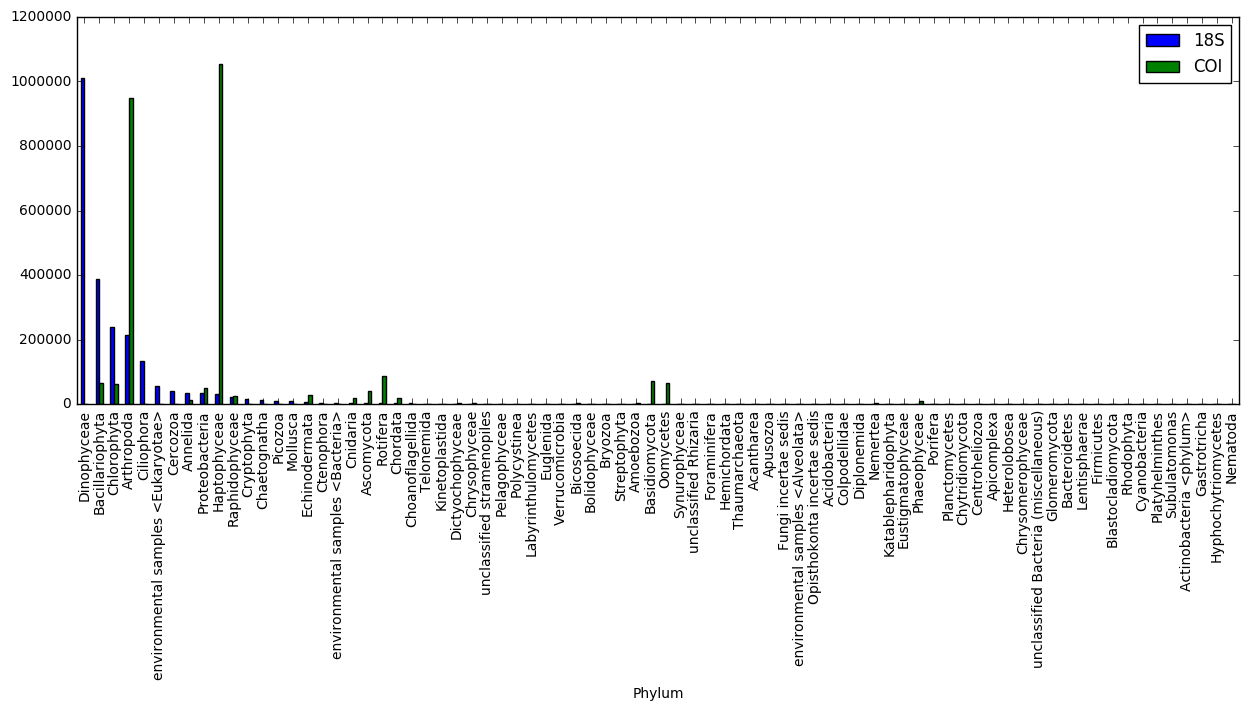

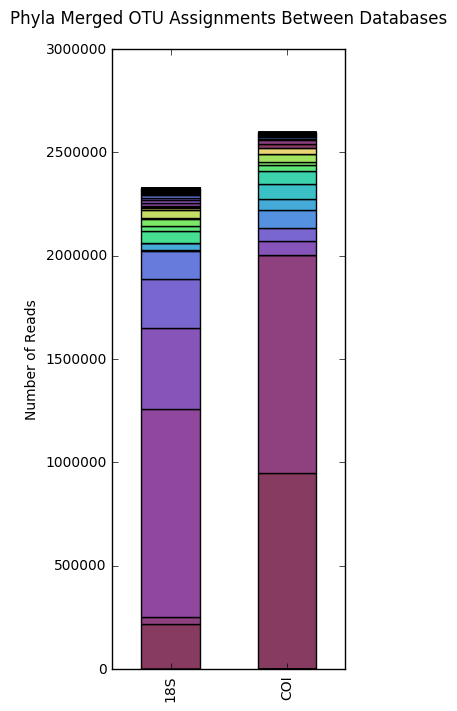

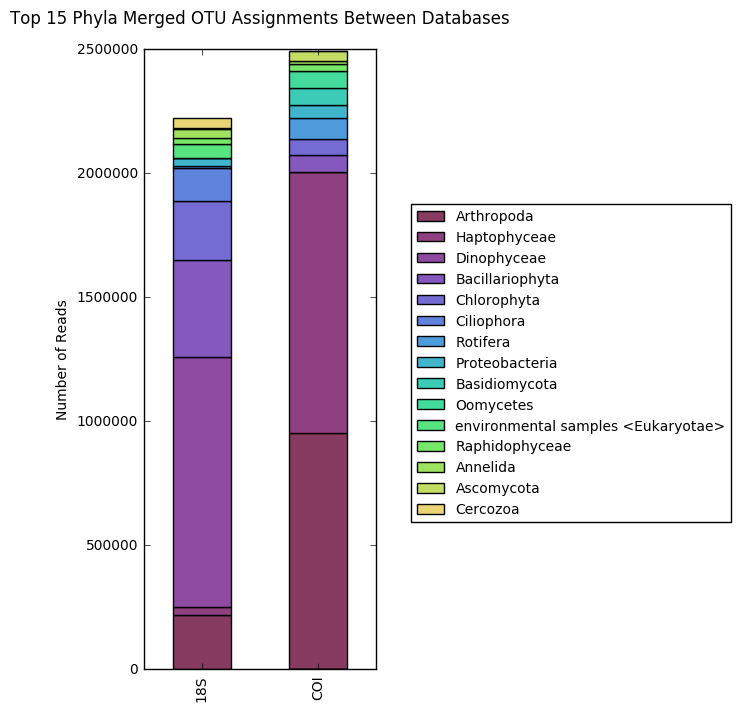

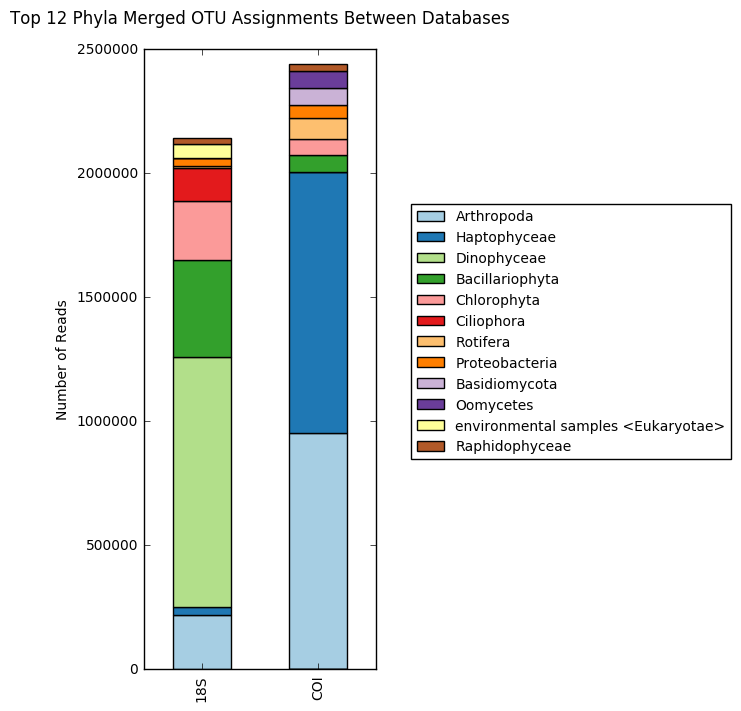

In [75]:
from palettable.cubehelix import perceptual_rainbow_16

#colormap=Tableau_20.mpl_colormap
colormap=perceptual_rainbow_16.mpl_colormap
colors = perceptual_rainbow_16.mpl_colors

#phylum.head(n=50).plot(kind='bar', figsize=(15,5))
phylum.plot(kind='bar', figsize=(15,5))
phylum_top.transpose().plot(kind='bar', stacked=True, figsize=(3,8), legend=False, 
                        color=colors
                        #cmap=colormap
                       )
#plt.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
plt.ylabel('Number of Reads')
plt.title('Phyla Merged OTU Assignments Between Databases', y=1.03)
filename='/Users/kpitz/Documents/test.pdf'
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
        orientation='profile', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=1,
        frameon=None)

phylum_top.head(n=15).transpose().plot(kind='bar', stacked=True, figsize=(3,8), legend=False, 
                        #color=colors
                        cmap=colormap
                       )

plt.legend(bbox_to_anchor=(1.15, .75), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
plt.ylabel('Number of Reads')
plt.title('Top 15 Phyla Merged OTU Assignments Between Databases', y=1.03)
filename='/Users/kpitz/Documents/test2.pdf'
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
        orientation='profile', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=1,
        frameon=None)

#Paired_12
from palettable.colorbrewer.qualitative import Paired_12
colors = Paired_12.mpl_colors
phylum_top.head(n=12).transpose().plot(kind='bar', stacked=True, figsize=(3,8), legend=False, 
                        color=colors
                        #cmap=colormap
                       )

plt.legend(bbox_to_anchor=(1.15, .75), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
plt.ylabel('Number of Reads')
plt.title('Top 12 Phyla Merged OTU Assignments Between Databases', y=1.03)
filename='/Users/kpitz/Documents/test3.pdf'
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
        orientation='profile', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=1,
        frameon=None)

plt.show()

In [76]:
frames = (fracts_A, fracts_B)
test3= pd.concat(frames, axis=1)
test3

,18S,COI
Class,6,4
Family,38,5
Genus,246,107
Kingdom,0,0
Order,13,1
Phylum,4,0
Species,646,532


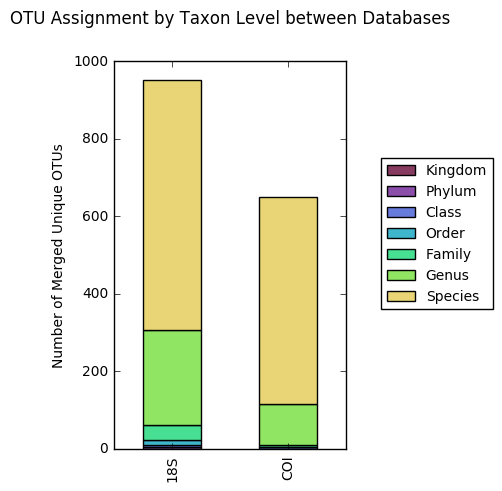

In [77]:
test3.transpose().reindex(columns=['Kingdom','Phylum','Class','Order','Family','Genus','Species']).plot(kind='bar', stacked=True, figsize=(3,5), cmap=colormap)
plt.legend(bbox_to_anchor=(1.15, .75), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
plt.ylabel('Number of Merged Unique OTUs')
plt.title('OTU Assignment by Taxon Level between Databases', y=1.08)

filename='/Users/kpitz/Documents/test4.pdf'
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
        orientation='profile', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=1,
        frameon=None)
plt.show()

In [78]:
frames = (stats_A, stats_B)

test4= pd.concat(frames, axis=1).astype(int)
test4

,18S,COI
Clustered_OTUs,16838,76769
Megan_Assigned_OTUs,5075,39193
Merged_Unique_OTUs,953,649
Percent_Assigned_OTUs,30,51
Percent_Assigned_Reads,26,68
Total_Assigned_Reads,2328337,2599618
Total_Reads,8911501,3822526


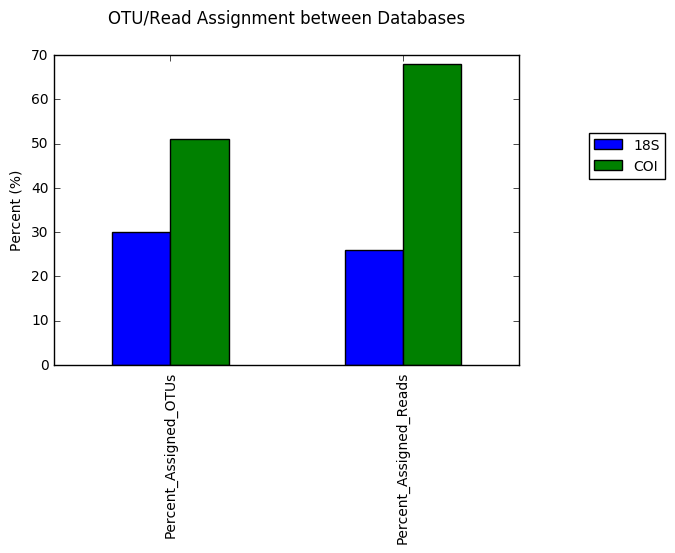

In [79]:
#Compare % OTUs ; Compare % Assigned Reads
test5=test4.transpose()
test5.drop(['Clustered_OTUs','Megan_Assigned_OTUs','Merged_Unique_OTUs','Total_Assigned_Reads', 'Total_Reads'], inplace=True, axis=1)
test5.transpose().plot(kind='bar', stacked=False)
plt.legend(bbox_to_anchor=(1.15, .75), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
plt.ylabel('Percent (%)')
plt.title('OTU/Read Assignment between Databases', y=1.08)

filename='/Users/kpitz/Documents/test5.pdf'
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=1,
        frameon=None)

plt.show()

In [80]:
merged_reads_Class_A
test= merged_reads_Class_A.reset_index()
#test=test.loc[test['Kingdom'] == test['Phylum']]
test=test.transpose()
test['sum']= test.sum(axis=1)
test

,0,1,2,3,4,5,6,7,8,9,...,133,134,135,136,137,138,139,140,141,sum
Kingdom,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,...,Eukaryota,Eukaryota,Eukaryota,Bacteria,Bacteria,Eukaryota,Eukaryota,Eukaryota,Eukaryota,EukaryotaEukaryotaEukaryotaEukaryotaEukaryotaE...
Phylum,Dinophyceae,Chlorophyta,Bacillariophyta,Bacillariophyta,Arthropoda,Ciliophora,Ciliophora,environmental samples <Eukaryotae>,Arthropoda,Cercozoa,...,Subulatomonas,Rhodophyta,Chordata,Firmicutes,Lentisphaerae,Blastocladiomycota,Apicomplexa,Ascomycota,Platyhelminthes,DinophyceaeChlorophytaBacillariophytaBacillari...
Class,Dinophyceae,Mamiellophyceae,Coscinodiscophyceae,Bacillariophyceae,Maxillopoda,Litostomatea,Spirotrichea,environmental samples <Eukaryotae>,Malacostraca,Cercozoa,...,Subulatomonas,Florideophyceae,Ascidiacea,Firmicutes,Lentisphaerae,Blastocladiomycetes,Gregarinasina,environmental sample,Rhabditophora,DinophyceaeMamiellophyceaeCoscinodiscophyceaeB...
18S,1010340,210415,185094,166695,160749,66129,62770,56752,54807,40067,...,2,2,2,2,2,2,2,2,2,2328337


In [81]:
#look at kingdom too
frames = (merged_reads_Class_A, merged_reads_Class_B)

test= pd.concat(frames, axis=1)
#test=test.sort('Tara', ascending=False)
#test=test.sort('Silva', ascending=False)
test.reset_index(inplace=True)
#test.drop('Kingdom', inplace=True, axis=1)
test=test.fillna(value=0, axis=1)
test2=test.groupby(['Kingdom','Phylum', 'Class']).sum()
test2=test2.sort(name, ascending=False)
test2
phylum = test.groupby(['Kingdom']).sum()

phylum_top = phylum[:]
phylum_top['summed']= phylum_top.sum(axis=1)

phylum_top=phylum_top.sort('summed', ascending=False)
phylum_top.drop('summed', inplace=True, axis=1)

phylum=phylum.sort(name, ascending=False)
phylum_top=phylum_top.transpose()
phylum_top['summed']= phylum_top.sum(axis=1)
phylum_top=phylum_top.transpose()
phylum_top


/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:21: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,18S,COI
Kingdom,,
Eukaryota,2287749.0,2547405.0
Bacteria,40364.0,52213.0
Archaea,224.0,0.0
summed,2328337.0,2599618.0


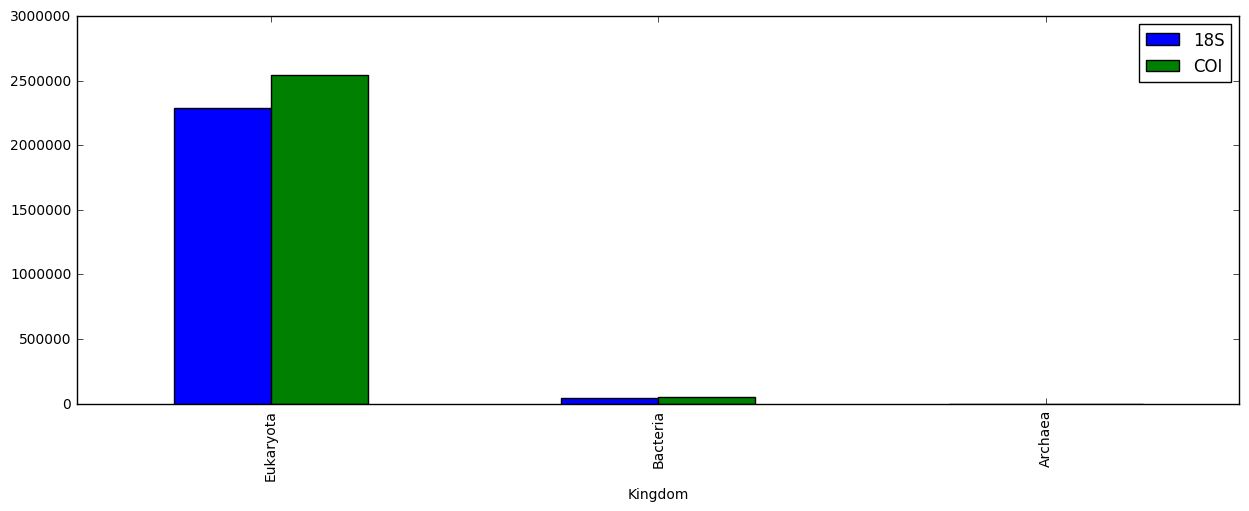

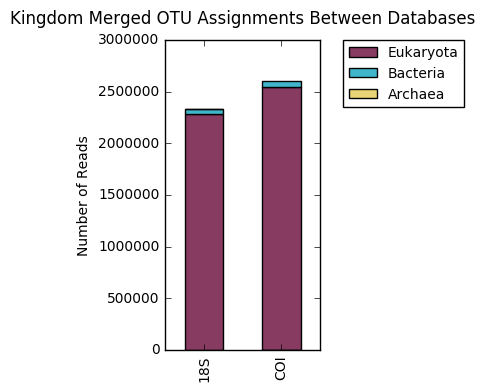

In [82]:
from palettable.cubehelix import perceptual_rainbow_16

phylum_top.drop('summed', axis=0, inplace=True)

#colormap=Tableau_20.mpl_colormap
colormap=perceptual_rainbow_16.mpl_colormap
colors = perceptual_rainbow_16.mpl_colors

#phylum.head(n=50).plot(kind='bar', figsize=(15,5))
phylum.plot(kind='bar', figsize=(15,5))
phylum_top.transpose().plot(kind='bar', stacked=True, figsize=(2,4), legend=False, 
                        #color=colors
                        cmap=colormap
                       )

plt.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
plt.ylabel('Number of Reads')
plt.title('Kingdom Merged OTU Assignments Between Databases', y=1.03)
filename='/Users/kpitz/Documents/test6.pdf'
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
        orientation='profile', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=1,
        frameon=None)

'''phylum_top.head(n=15).transpose().plot(kind='bar', stacked=True, figsize=(3,8), legend=False, 
                        #color=colors
                        cmap=colormap
                       )

plt.legend(bbox_to_anchor=(1.15, .75), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
plt.ylabel('Number of Reads')
plt.title('Top 15 Kingdom Merged OTU Assignments Between Databases', y=1.03)
filename='/Users/kpitz/Documents/Top15_phyla_merged_OTU_assignments_DBs.pdf'
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
        orientation='profile', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=1,
        frameon=None)

#Paired_12
from palettable.colorbrewer.qualitative import Paired_12
colors = Paired_12.mpl_colors
phylum_top.head(n=12).transpose().plot(kind='bar', stacked=True, figsize=(3,8), legend=False, 
                        #color=colors
                        cmap=colormap
                       )

plt.legend(bbox_to_anchor=(1.15, .75), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
plt.ylabel('Number of Reads')
plt.title('Top 12 Kingdom Merged OTU Assignments Between Databases', y=1.03)
filename='/Users/kpitz/Documents/Top12_phyla_merged_OTU_assignments_DBs.pdf'
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
        orientation='profile', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=1,
        frameon=None)'''

plt.show()

In [83]:
frames = (unique_A, unique_B)

test4= pd.concat(frames, axis=1)
test4

,18S,COI
Class,115,69
Family,404,302
Genus,557,403
Kingdom,3,2
Order,269,146
Phylum,62,41
Species,646,532


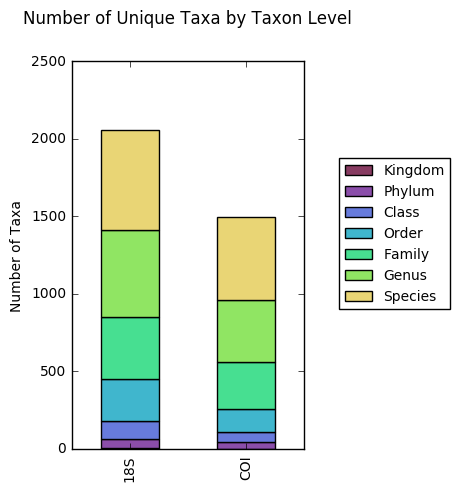

In [84]:
test4.transpose().reindex(columns=['Kingdom','Phylum','Class','Order','Family','Genus','Species']).plot(kind='bar', stacked=True, figsize=(3,5), cmap=colormap)
plt.legend(bbox_to_anchor=(1.15, .75), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
plt.ylabel('Number of Taxa')
plt.title('Number of Unique Taxa by Taxon Level', y=1.08)

filename='/Users/kpitz/Documents/test7.pdf'
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
        orientation='profile', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=1,
        frameon=None)
plt.show()

In [85]:
frames = (reads_A, reads_B)

test3= pd.concat(frames, axis=1)
test3

,18S,COI
Class,2254,16102
Family,55904,79
Genus,710942,395883
Kingdom,0,0
Order,11100,746
Phylum,125,0
Species,1548012,2186808


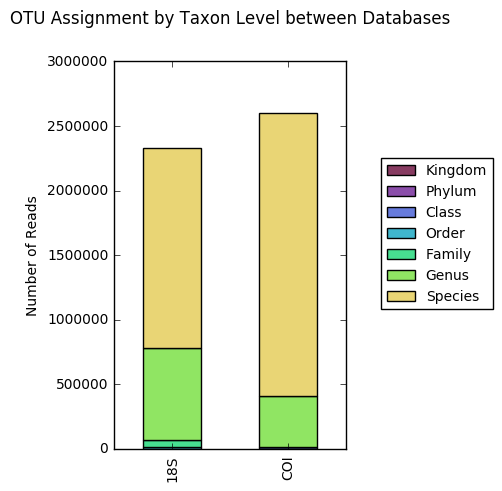

In [86]:
test3.transpose().reindex(columns=['Kingdom','Phylum','Class','Order','Family','Genus','Species']).plot(kind='bar', stacked=True, figsize=(3,5), cmap=colormap)
plt.legend(bbox_to_anchor=(1.15, .75), loc=2, borderaxespad=0.,ncol=1, fontsize='10')
plt.ylabel('Number of Reads')
plt.title('OTU Assignment by Taxon Level between Databases', y=1.08)

filename='/Users/kpitz/Documents/test8.pdf'
plt.savefig(filename,dpi=None, facecolor='w', edgecolor='w',
        orientation='profile', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=1,
        frameon=None)
plt.show()

In [87]:
#want to look at how the ranks of species/genera/classes between databases are different in the same samples.
#Need a dataframe of OTUs with Taxonomy with read# in Tara, NT, and Silva

frames = (merged_reads_Class_A, merged_reads_Class_B)

test= pd.concat(frames, axis=1)
#test=test.sort('Tara', ascending=False)
#test=test.sort('Silva', ascending=False)
test.reset_index(inplace=True)
test.drop('Kingdom', inplace=True, axis=1)
test2=test.groupby(['Phylum', 'Class']).sum()
test2=test2.sort(name, ascending=False)
test2
phylum = test.groupby(['Class']).sum()

phylum_top = phylum[:]
phylum_top['summed']= phylum_top.sum(axis=1)

phylum_top=phylum_top.sort('summed', ascending=False)
phylum_top.drop('summed', inplace=True, axis=1)

phylum=phylum.sort(name, ascending=False)
#phylum_top.drop(0, axis=0, inplace=True)
phylum_top

/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/kpitz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:22: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,18S,COI
Class,,
Haptophyceae,32818.0,1053571.0
Dinophyceae,1010340.0,207.0
Maxillopoda,160749.0,793222.0
Mamiellophyceae,210415.0,63573.0
Coscinodiscophyceae,185094.0,45517.0
Malacostraca,54807.0,146696.0
Bacillariophyceae,166695.0,7347.0
Monogononta,4628.0,86352.0
Exobasidiomycetes,17.0,70851.0
